<a href="https://colab.research.google.com/github/FernandoRivasPerez/Tarea6Array2dADT/blob/main/Array2dADT_1310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

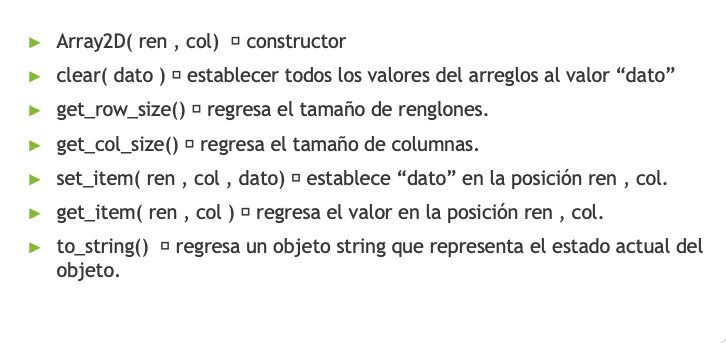

In [20]:
class Array2DADT:
    def __init__( self, ren , col ):
        self.__data = [ [ 0 for y in range(col) ] for x in range(ren) ]
        #print( self.__data )

    def clear( self , dato ):
        self.__data = [ [ dato for y in range(self.get_col_size()) ] for x in range(self.get_row_size()) ]
    
    def get_row_size( self ):
        return len( self.__data )

    def get_col_size( self ):
        return len( self.__data[0] )

    def set_item( self , ren , col , dato):
        self.__data[ren][col] = dato
    
    def get_item( self , ren, col ):
        return self.__data[ren][col]

    def to_string( self ):
        cadena = ""
        for renglon in self.__data:
            cadena = cadena + "|"
            for dato in renglon:
                cadena = cadena + str(dato) + " | "
            cadena = cadena +"\n"
        return cadena



In [21]:
a2d = Array2DADT( 3 , 6)
print(f"Ren: { a2d.get_row_size() }")
print(f"Col: { a2d.get_col_size() }")
print("")
print(a2d.to_string())
print("")
a2d.clear("M")
print(a2d.to_string())

a2d.set_item(2,3,'p')
print(a2d.to_string())
print(a2d.get_item(2,3))

Ren: 3
Col: 6

|0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 


|M | M | M | M | M | M | 
|M | M | M | M | M | M | 
|M | M | M | M | M | M | 

|M | M | M | M | M | M | 
|M | M | M | M | M | M | 
|M | M | M | p | M | M | 

p


In [24]:
"""
Los datos iniciales como lo son 
1.- Tamaño de la población (ren y col)
2.- La población inicial
3.- El numero de generaciones a simular

Estarán proporcionadas por un archivo de
entrada separado por comas (CSV)

5
5
0,0,0,0,0
0,0,1,0,0
0,1,1,1,0
0,0,0,0,0
0,0,0,0,0
10

"""
class JuegoDeLaVida:
    def __init__( self, ruta_archivo ):
        self.rens = None
        self.cols = None
        self.tablero = None
        self.generaciones = None
        self.read_game_data( ruta_archivo )

    def read_game_data( self, archivo):
        archivo = open(archivo, 'rt')
        lineas = archivo.readlines()
        for index in range(len(lineas)):
            lineas[index] = lineas[index].strip()
        #print(lineas)
        self.rens = int( lineas[0] )
        self.cols = int( lineas[1] )
        self.tablero = Array2DADT( self.rens , self.cols )
        r = 0
        c = 0
        for index in range( 2 , 2 + self.rens , 1 ):
            c = 0
            for dato in lineas[index].split(','):
                self.tablero.set_item( r , c , int(dato))
                c += 1
            r += 1

        self.generaciones = int( lineas[ - 1 ] )
        print( "Generaciones a calcular: " ,self.generaciones , "\n")
        print("GENERACION INICIAL: \n")
        print(self.tablero.to_string())

    def get_vecinos( self , r , c):
        vecinos = []
        for ren in range( r-1 , r+2 , 1 ):
            for col in range(c-1 , c+2 , 1):
                if ren < 0 or ren >= self.tablero.get_row_size() or col < 0 or col >= self.tablero.get_col_size() or (ren==r and col==c):
                    pass
                else:
                    vecinos.append((ren,col))
        return vecinos
    
    def get_vecinos_vivos( self , r , c ):
        vecinos = self.get_vecinos(r, c)
        vivos = 0
        for par in vecinos:
            if self.tablero.get_item( par[0] , par[1] ) == 1:
                vivos += 1
        return vivos

    def calcular_siguiente( self ):
        nueva_gen = Array2DADT( self.rens, self.cols )
        #Aplicar 4 reglas a cada celula y el resultado ponerlo en nueva_gen
        gen = 1
        while gen < self.generaciones:
            print(f"No. de generación: {gen + 1} \n")
            for ren in range( self.rens ):
                for col in range( self.cols ):
                    estado = self.tablero.get_item(ren,col)
                    vivos = self.get_vecinos_vivos(ren,col)
                    #print(estado)
                    #print(vivos)
                    if estado == 1:
                        if vivos == 2 or vivos == 3:
                            nueva_gen.set_item(ren,col,1)
                        elif vivos == 0 or vivos == 1:
                            nueva_gen.set_item(ren,col,0)
                        elif vivos >= 4:
                            nueva_gen.set_item(ren,col,0)
                    elif estado == 0: 
                        if vivos == 3:
                            nueva_gen.set_item(ren,col,1)
                        else:
                            nueva_gen.set_item(ren,col,0)
                    #print(f"| {nueva_gen} ", end = "")
                    #Aplicar las gen (las demás reglas)
                    #print(f"{ren},{col} --->{self.get_vecinos_vivos(ren,col)}", end=" | ")
                    #print(nueva_gen)
                #print("|")
            gen += 1
            self.tablero = nueva_gen
            print(self.tablero.to_string())



In [25]:
juego = JuegoDeLaVida( "entrada.txt" )
juego.get_vecinos( 0, 1 )
juego.get_vecinos_vivos( 1, 2 )
juego.calcular_siguiente()

Generaciones a calcular:  10 

GENERACION INICIAL: 

|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 2 

|0 | 0 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 
|0 | 1 | 1 | 1 | 0 | 
|0 | 0 | 1 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 3 

|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 
|0 | 1 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 4 

|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 1 | 0 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 5 

|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 6 

|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 7 

|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 

No. de generación: 8 

|0 | 0 | 

In [27]:
juego = JuegoDeLaVida( "entrada2.txt" )
juego.calcular_siguiente()

Generaciones a calcular:  12 

GENERACION INICIAL: 

|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 0 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 1 | 0 | 0 | 
|0 | 0 | 0 | 1 | 0 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 

No. de generación: 2 

|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 0 | 0 | 
|0 | 1 | 1 | 1 | 0 | 0 | 0 | 
|0 | 0 | 1 | 1 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 1 | 0 | 0 | 
|0 | 0 | 0 | 0 | 1 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 

No. de generación: 3 

|0 | 0 | 1 | 1 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 1 | 0 | 1 | 0 | 0 | 0 | 
|0 | 0 | 1 | 1 | 1 | 0 | 0 | 
|0 | 0 | 0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 

No. de generación: 4 

|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 0 | 0 | 0 | 0 | 
|0 | 0 | 1 | 0 | 1 | 1 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 
|0 | 0 | 0 | 0 | 0 | 0 | 0 | 

No. de generación: 5 

|0 | 0 | 0 